# 1. Análisis Exploratorio de Datos (EDA)

**Objetivo:**  
Entender a fondo el dataset limpio `pet_adoption_clean.csv` antes de modelar.

**Estructura del EDA:**
1. Carga y resumen general
2. Análisis de la variable objetivo (`TimeInShelterDays`)
3. Variables numéricas
4. Variables categóricas
5. Correlaciones y relaciones con el target
6. Conclusiones y decisiones para el modelado


In [1]:
# ============================================
# Importaciones
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Estilo global
plt.rcParams['figure.dpi'] = 120
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
sns.set_palette('husl')

print('✅ Librerías importadas correctamente')

✅ Librerías importadas correctamente


---
## 1.1 Carga y Resumen General


In [2]:
# ============================================
# Cargar Dataset
# ============================================

df = pd.read_csv('../data/pet_adoption_clean.csv')

print('=' * 70)
print('RESUMEN GENERAL DEL DATASET')
print('=' * 70)
print(f'\n📐 Shape: {df.shape[0]:,} filas × {df.shape[1]} columnas')
print(f'\n📋 Columnas:')
for col in df.columns:
    dtype = df[col].dtype
    nulls = df[col].isnull().sum()
    unique = df[col].nunique()
    print(f'   {col:<30} dtype={str(dtype):<10} nulls={nulls:<5} unique={unique}')

print(f'\n🎯 Variable objetivo: TimeInShelterDays')
print(f'   Min: {df["TimeInShelterDays"].min()}')
print(f'   Max: {df["TimeInShelterDays"].max()}')
print(f'   Media: {df["TimeInShelterDays"].mean():.2f}')
print(f'   Mediana: {df["TimeInShelterDays"].median():.2f}')

RESUMEN GENERAL DEL DATASET

📐 Shape: 59,919 filas × 8 columnas

📋 Columnas:
   AnimalType                     dtype=object     nulls=0     unique=5
   Breed                          dtype=object     nulls=0     unique=1884
   Color                          dtype=object     nulls=0     unique=443
   Sex                            dtype=object     nulls=0     unique=5
   IntakeType                     dtype=object     nulls=0     unique=6
   IntakeCondition                dtype=object     nulls=0     unique=10
   TimeInShelterDays              dtype=int64      nulls=0     unique=365
   AgeInDays                      dtype=int64      nulls=0     unique=42

🎯 Variable objetivo: TimeInShelterDays
   Min: 1
   Max: 365
   Media: 38.52
   Mediana: 15.00


In [3]:
# Primeras filas
df.head()

,AnimalType,Breed,Color,Sex,IntakeType,IntakeCondition,TimeInShelterDays,AgeInDays
0,Cat,Domestic Shorthair,Cream Tabby,Intact Male,Stray,Normal,35,28
1,Dog,Chihuahua Shorthair,White/Tan,Intact Male,Stray,Normal,4,730
2,Dog,Pit Bull,Brown/White,Intact Female,Stray,Normal,139,150
3,Dog,Chihuahua Shorthair,Tricolor,Intact Female,Stray,Normal,112,730
4,Cat,Domestic Shorthair Mix,Brown Tabby/White,Neutered Male,Owner Surrender,Normal,76,5110


In [23]:
# Primeras filas
df['Color'].unique


<bound method Series.unique of 0              Cream Tabby
1                White/Tan
2              Brown/White
3                 Tricolor
4        Brown Tabby/White
               ...        
59914            Tan/White
59915             Tricolor
59916            Tan/White
59917             Tricolor
59918            Black/Tan
Name: Color, Length: 59919, dtype: object>

In [4]:
# Estadísticas descriptivas completas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AnimalType,59919,5,Dog,37256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breed,59919,1884,Domestic Shorthair Mix,14281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,59919,443,Black/White,6893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,59919,5,Intact Male,22337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IntakeType,59919,6,Stray,42270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IntakeCondition,59919,10,Normal,55732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeInShelterDays,59919.0,NaN,NaN,NaN,38.523423,57.175649,1.0,5.0,15.0,48.0,365.0
AgeInDays,59919.0,NaN,NaN,NaN,591.289374,868.293755,0.0,60.0,300.0,730.0,6935.0


---
## 1.2 Análisis de la Variable Objetivo: `TimeInShelterDays`

> ⚠️ **Punto crítico**: Como la media (38.5) >> mediana (15), hay sesgo a la derecha.  
> Aquí evaluamos si conviene aplicar **log-transform** antes de modelar.


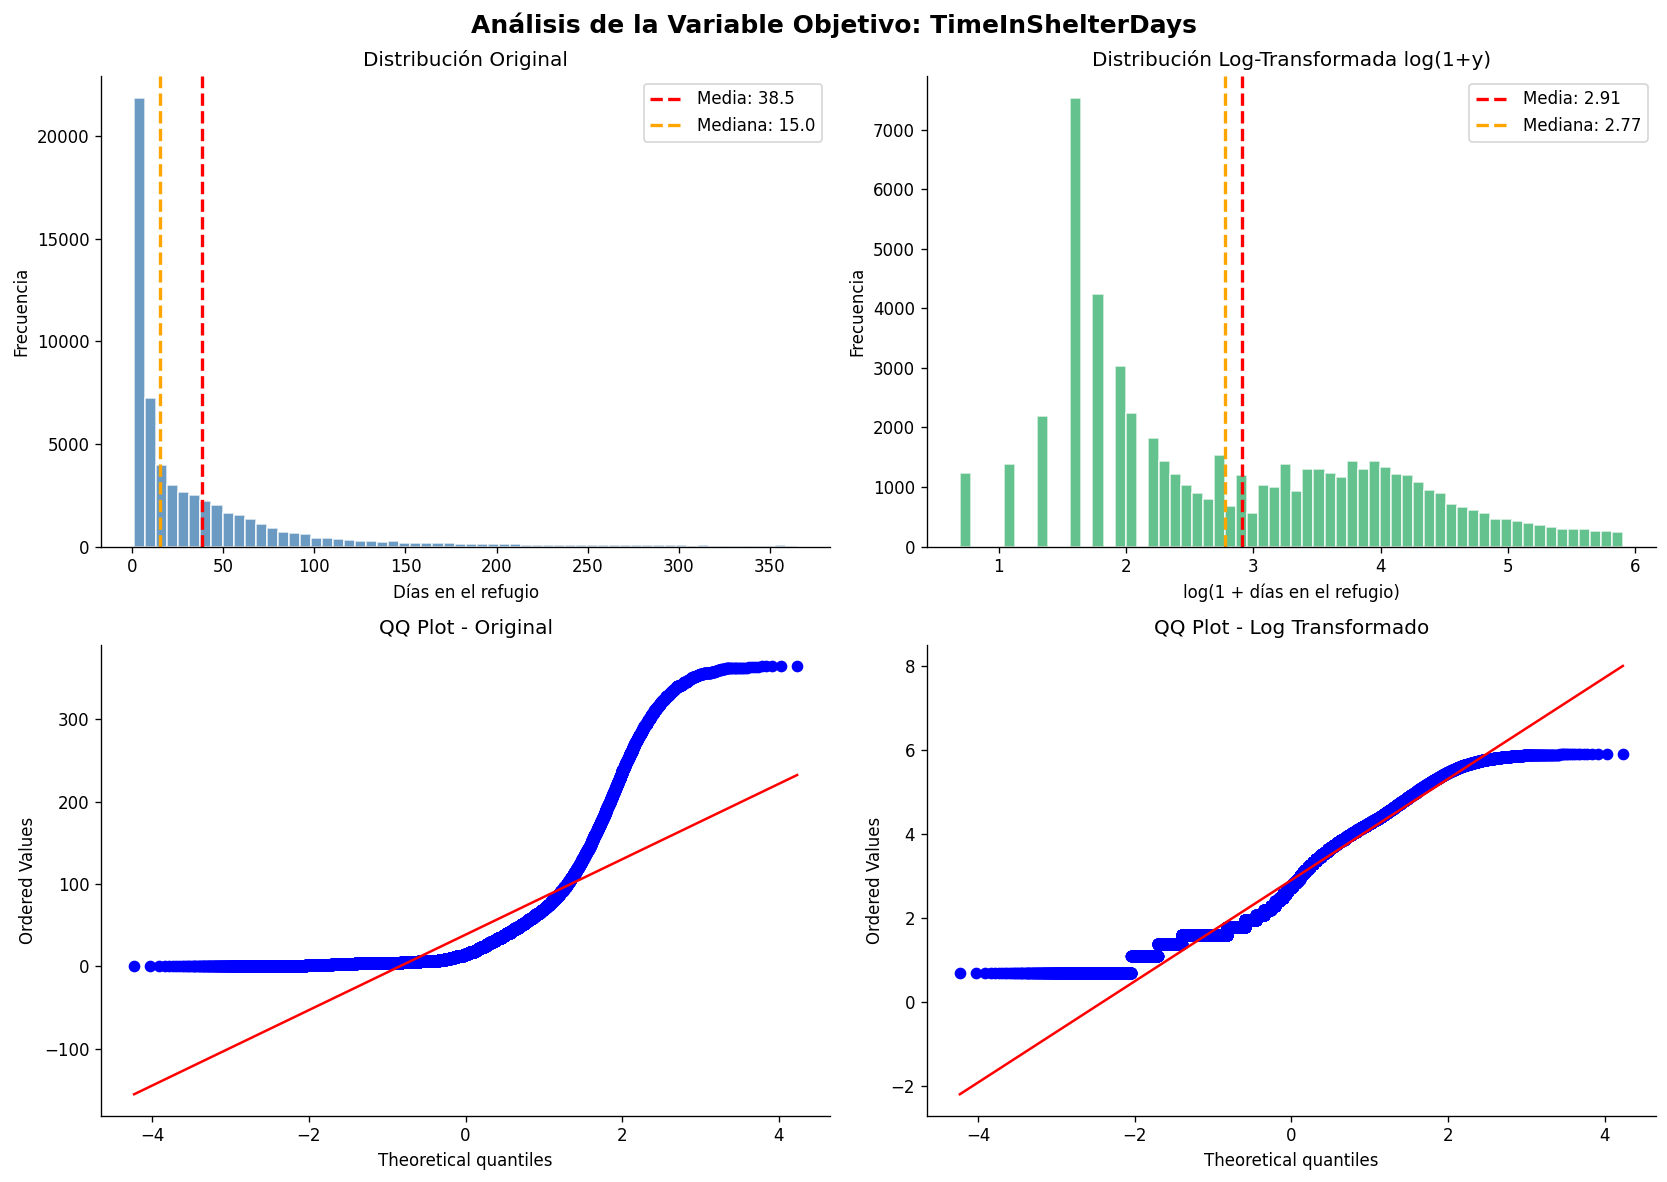

TEST DE NORMALIDAD (Shapiro-Wilk, n=5000)
  Original    - p-value: 0.000000  ❌ NO Normal
  Log(1+y)    - p-value: 0.000000  ❌ NO Normal (pero más simétrico)

  Skewness original:      2.827
  Skewness log(1+y):      0.350
  Kurtosis original:      9.164
  Kurtosis log(1+y):      -0.869


In [5]:
# ============================================
# Distribución de la Variable Objetivo
# ============================================

y = df['TimeInShelterDays']
y_log = np.log1p(y)  # log(1+y) para evitar log(0)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis de la Variable Objetivo: TimeInShelterDays', fontsize=15, fontweight='bold')

# --- Histograma original ---
ax = axes[0, 0]
ax.hist(y, bins=60, color='steelblue', edgecolor='white', alpha=0.8)
ax.axvline(y.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {y.mean():.1f}')
ax.axvline(y.median(), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {y.median():.1f}')
ax.set_title('Distribución Original')
ax.set_xlabel('Días en el refugio')
ax.set_ylabel('Frecuencia')
ax.legend()

# --- Histograma log-transformado ---
ax = axes[0, 1]
ax.hist(y_log, bins=60, color='mediumseagreen', edgecolor='white', alpha=0.8)
ax.axvline(y_log.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {y_log.mean():.2f}')
ax.axvline(y_log.median(), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {y_log.median():.2f}')
ax.set_title('Distribución Log-Transformada log(1+y)')
ax.set_xlabel('log(1 + días en el refugio)')
ax.set_ylabel('Frecuencia')
ax.legend()

# --- QQ Plot original ---
ax = axes[1, 0]
stats.probplot(y, dist='norm', plot=ax)
ax.set_title('QQ Plot - Original')

# --- QQ Plot log ---
ax = axes[1, 1]
stats.probplot(y_log, dist='norm', plot=ax)
ax.set_title('QQ Plot - Log Transformado')

plt.tight_layout()
plt.show()

# Test de normalidad (muestra de 5000 para Shapiro)
sample = y.sample(5000, random_state=42)
sample_log = np.log1p(sample)
_, p_orig = stats.shapiro(sample)
_, p_log = stats.shapiro(sample_log)

print('=' * 60)
print('TEST DE NORMALIDAD (Shapiro-Wilk, n=5000)')
print('=' * 60)
print(f'  Original    - p-value: {p_orig:.6f}  {"✅ Normal" if p_orig > 0.05 else "❌ NO Normal"}')
print(f'  Log(1+y)    - p-value: {p_log:.6f}  {"✅ Normal" if p_log > 0.05 else "❌ NO Normal (pero más simétrico)"}')
print(f'\n  Skewness original:      {y.skew():.3f}')
print(f'  Skewness log(1+y):      {y_log.skew():.3f}')
print(f'  Kurtosis original:      {y.kurtosis():.3f}')
print(f'  Kurtosis log(1+y):      {y_log.kurtosis():.3f}')

In [6]:
# ============================================
# Decisión sobre Transformación del Target
# ============================================

print('=' * 70)
print('DECISIÓN: ¿Aplicar log-transform a TimeInShelterDays?')
print('=' * 70)

skew_orig = y.skew()
skew_log = y_log.skew()

print(f"""
📊 Resumen:
   Skewness original:   {skew_orig:.2f}  (>1 = sesgo significativo)
   Skewness log(1+y):  {skew_log:.2f}  (cercano a 0 = más simétrico)

✅ DECISIÓN: Usar log(1 + TimeInShelterDays) como target de entrenamiento

   Razones:
   1. La distribución original tiene sesgo a la derecha ({skew_orig:.1f}),
      lo que penaliza desproporcionadamente los outliers en MSE.
   2. La versión log es mucho más simétrica ({skew_log:.2f}),
      lo que mejora la estabilidad de regresión lineal y árboles.
   3. En el dominio real (días), el error relativo importa más que el
      absoluto: no es lo mismo equivocarse 10 días en un animal de 5
      que en uno de 200. Log captura esto naturalmente.
   4. Al predecir, se aplica la inversa: exp(pred) - 1 → días reales.

⚠️  NOTA: Evaluaremos modelos con RMSE en la escala original (días)
          para que las métricas sean interpretables.
""")

# Crear columna log-transformada para referencia
df['TimeInShelterDays_log'] = np.log1p(df['TimeInShelterDays'])
print('✅ Columna TimeInShelterDays_log creada (solo para análisis EDA)')

DECISIÓN: ¿Aplicar log-transform a TimeInShelterDays?

📊 Resumen:
   Skewness original:   2.83  (>1 = sesgo significativo)
   Skewness log(1+y):  0.35  (cercano a 0 = más simétrico)

✅ DECISIÓN: Usar log(1 + TimeInShelterDays) como target de entrenamiento

   Razones:
   1. La distribución original tiene sesgo a la derecha (2.8),
      lo que penaliza desproporcionadamente los outliers en MSE.
   2. La versión log es mucho más simétrica (0.35),
      lo que mejora la estabilidad de regresión lineal y árboles.
   3. En el dominio real (días), el error relativo importa más que el
      absoluto: no es lo mismo equivocarse 10 días en un animal de 5
      que en uno de 200. Log captura esto naturalmente.
   4. Al predecir, se aplica la inversa: exp(pred) - 1 → días reales.

⚠️  NOTA: Evaluaremos modelos con RMSE en la escala original (días)
          para que las métricas sean interpretables.

✅ Columna TimeInShelterDays_log creada (solo para análisis EDA)


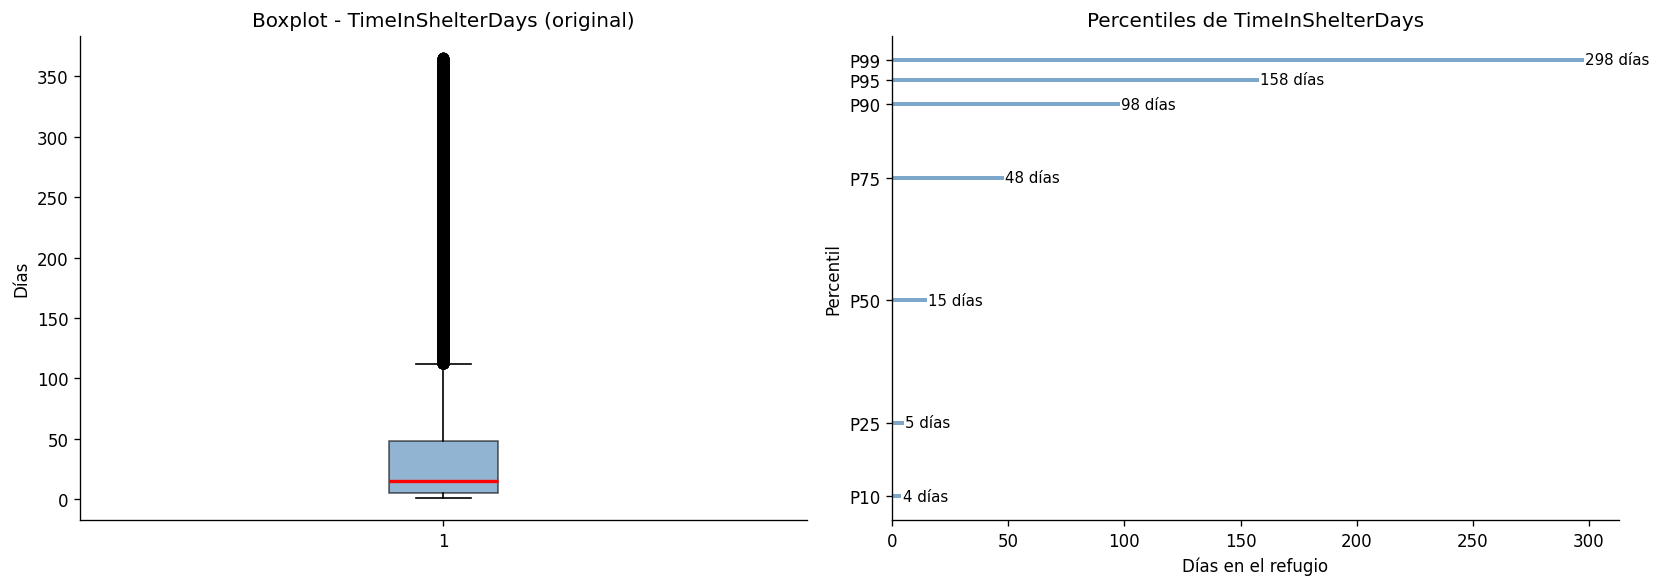

Percentiles:
  P10: 4 días
  P25: 5 días
  P50: 15 días
  P75: 48 días
  P90: 98 días
  P95: 158 días
  P99: 298 días


In [7]:
# ============================================
# Boxplot y percentiles del target
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot original
axes[0].boxplot(y, vert=True, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.6),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Boxplot - TimeInShelterDays (original)')
axes[0].set_ylabel('Días')

# Percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
vals = [np.percentile(y, p) for p in percentiles]
axes[1].barh(percentiles, vals, color='steelblue', alpha=0.7)
for p, v in zip(percentiles, vals):
    axes[1].text(v + 0.5, p, f'{v:.0f} días', va='center', fontsize=9)
axes[1].set_xlabel('Días en el refugio')
axes[1].set_ylabel('Percentil')
axes[1].set_title('Percentiles de TimeInShelterDays')
axes[1].set_yticks(percentiles)
axes[1].set_yticklabels([f'P{p}' for p in percentiles])

plt.tight_layout()
plt.show()

print('Percentiles:')
for p, v in zip(percentiles, vals):
    print(f'  P{p:>2}: {v:.0f} días')

---
## 1.3 Variables Numéricas


In [8]:
# ============================================
# Identificar variables numéricas y categóricas
# ============================================

# Excluir el target y su versión log
TARGET = 'TimeInShelterDays'
TARGET_LOG = 'TimeInShelterDays_log'
exclude_cols = [TARGET, TARGET_LOG]

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in exclude_cols]

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in exclude_cols]

print(f'Variables numéricas ({len(num_cols)}): {num_cols}')
print(f'Variables categóricas ({len(cat_cols)}): {cat_cols}')

Variables numéricas (1): ['AgeInDays']
Variables categóricas (6): ['AnimalType', 'Breed', 'Color', 'Sex', 'IntakeType', 'IntakeCondition']


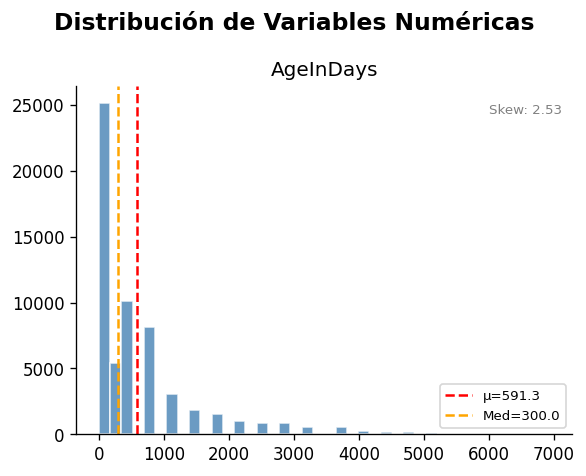

In [9]:
# ============================================
# Distribución de Variables Numéricas
# ============================================

if len(num_cols) > 0:
    n_cols = min(3, len(num_cols))
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = np.array(axes).flatten() if len(num_cols) > 1 else [axes]

    for i, col in enumerate(num_cols):
        ax = axes[i]
        data = df[col].dropna()
        ax.hist(data, bins=40, color='steelblue', edgecolor='white', alpha=0.8)
        ax.axvline(data.mean(), color='red', linestyle='--', linewidth=1.5, label=f'μ={data.mean():.1f}')
        ax.axvline(data.median(), color='orange', linestyle='--', linewidth=1.5, label=f'Med={data.median():.1f}')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.legend(fontsize=8)
        ax.text(0.98, 0.95, f'Skew: {data.skew():.2f}', transform=ax.transAxes,
                ha='right', va='top', fontsize=8, color='gray')

    # Ocultar ejes extra
    for j in range(len(num_cols), len(axes)):
        axes[j].set_visible(False)

    fig.suptitle('Distribución de Variables Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print('No hay variables numéricas adicionales al target.')

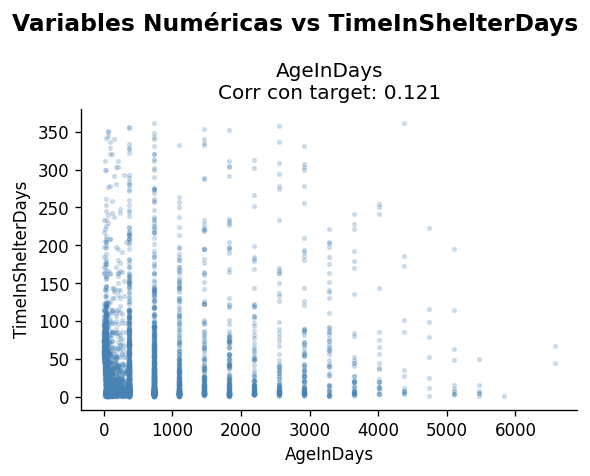


Correlaciones con TimeInShelterDays:
  AgeInDays                      +0.1214  ██


In [10]:
# ============================================
# Scatter: Numéricas vs Target
# ============================================

if len(num_cols) > 0:
    n_cols = min(3, len(num_cols))
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = np.array(axes).flatten() if len(num_cols) > 1 else [axes]

    for i, col in enumerate(num_cols):
        ax = axes[i]
        # Muestra aleatoria para no saturar el plot
        sample = df[[col, TARGET]].dropna().sample(min(5000, len(df)), random_state=42)
        ax.scatter(sample[col], sample[TARGET], alpha=0.2, s=5, color='steelblue')
        corr = df[col].corr(df[TARGET])
        ax.set_xlabel(col)
        ax.set_ylabel('TimeInShelterDays')
        ax.set_title(f'{col}\nCorr con target: {corr:.3f}')

    for j in range(len(num_cols), len(axes)):
        axes[j].set_visible(False)

    fig.suptitle('Variables Numéricas vs TimeInShelterDays', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print('\nCorrelaciones con TimeInShelterDays:')
    corrs = df[num_cols].corrwith(df[TARGET]).sort_values(key=abs, ascending=False)
    for c, v in corrs.items():
        bar = '█' * int(abs(v) * 20)
        print(f'  {c:<30} {v:+.4f}  {bar}')

---
## 1.4 Variables Categóricas


Variables baja cardinalidad (≤25 cats): ['AnimalType', 'Sex', 'IntakeType', 'IntakeCondition']
Variables alta cardinalidad (>25 cats):  ['Breed', 'Color']


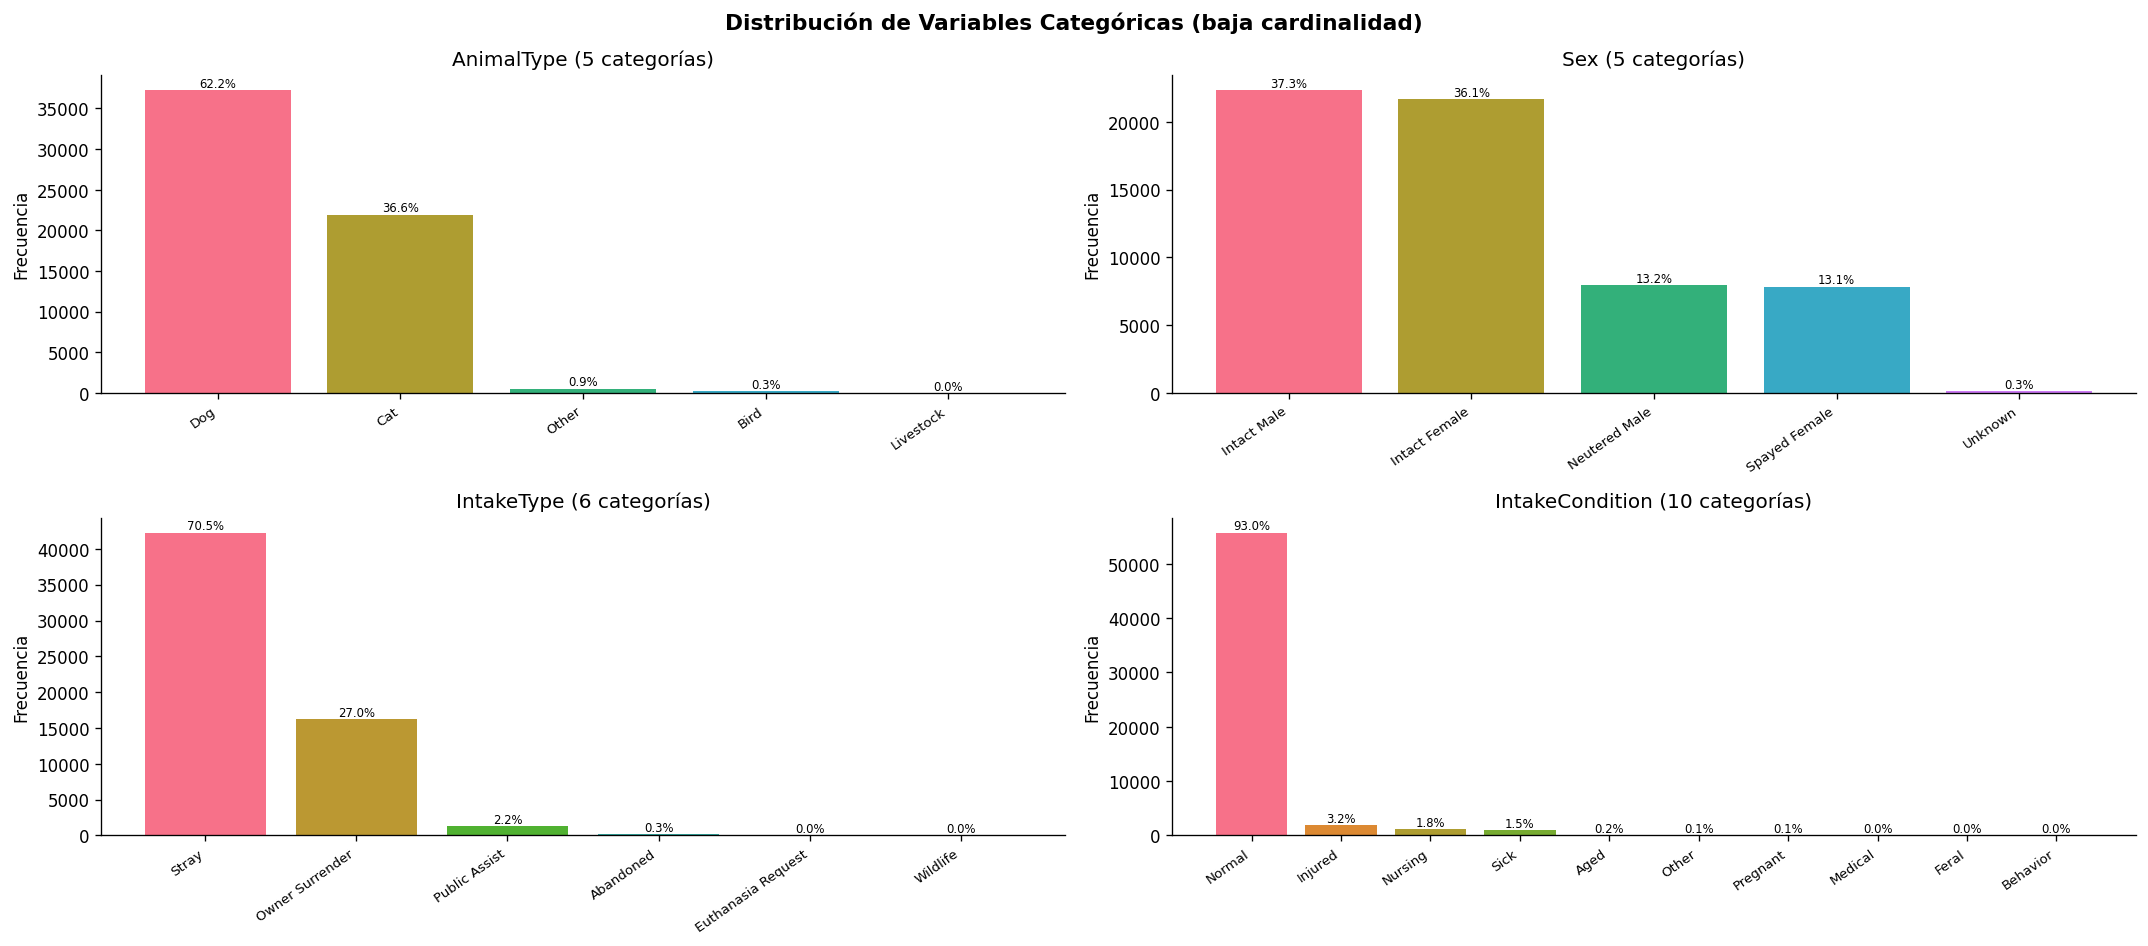


Alta cardinalidad - Top 15 valores:

  Breed (1884 categorías únicas):
    Domestic Shorthair Mix               14281 (23.8%)
    Labrador Retriever Mix                4016 (6.7%)
    Pit Bull Mix                          3861 (6.4%)
    Domestic Shorthair                    3342 (5.6%)
    Chihuahua Shorthair Mix               3181 (5.3%)
    German Shepherd Mix                   1812 (3.0%)
    Domestic Medium Hair Mix              1524 (2.5%)
    Australian Cattle Dog Mix              954 (1.6%)
    Domestic Longhair Mix                  776 (1.3%)
    Siamese Mix                            634 (1.1%)
    Pit Bull                               588 (1.0%)
    Border Collie Mix                      576 (1.0%)
    Labrador Retriever                     561 (0.9%)
    Dachshund Mix                          558 (0.9%)
    Boxer Mix                              536 (0.9%)

  Color (443 categorías únicas):
    Black/White                           6893 (11.5%)
    Black                   

In [11]:
# ============================================
# Frecuencia de Variables Categóricas
# ============================================

if len(cat_cols) > 0:
    # Mostrar solo las que tienen <= 25 categorías (las otras son de alta cardinalidad)
    low_card = [c for c in cat_cols if df[c].nunique() <= 25]
    high_card = [c for c in cat_cols if df[c].nunique() > 25]

    print(f'Variables baja cardinalidad (≤25 cats): {low_card}')
    print(f'Variables alta cardinalidad (>25 cats):  {high_card}')

    if low_card:
        n_cols = min(2, len(low_card))
        n_rows = (len(low_card) + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(9 * n_cols, 4 * n_rows))
        axes = np.array(axes).flatten() if len(low_card) > 1 else [axes]

        for i, col in enumerate(low_card):
            ax = axes[i]
            vc = df[col].value_counts()
            bars = ax.bar(range(len(vc)), vc.values, color=sns.color_palette('husl', len(vc)))
            ax.set_xticks(range(len(vc)))
            ax.set_xticklabels(vc.index, rotation=35, ha='right', fontsize=8)
            ax.set_title(f'{col} ({df[col].nunique()} categorías)')
            ax.set_ylabel('Frecuencia')
            # Porcentajes sobre barras
            total = len(df)
            for bar, val in zip(bars, vc.values):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        f'{val/total*100:.1f}%', ha='center', va='bottom', fontsize=7)

        for j in range(len(low_card), len(axes)):
            axes[j].set_visible(False)

        fig.suptitle('Distribución de Variables Categóricas (baja cardinalidad)', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()

    if high_card:
        print(f'\nAlta cardinalidad - Top 15 valores:')
        for col in high_card:
            print(f'\n  {col} ({df[col].nunique()} categorías únicas):')
            top15 = df[col].value_counts().head(15)
            for k, v in top15.items():
                print(f'    {k:<35} {v:>6} ({v/len(df)*100:.1f}%)')

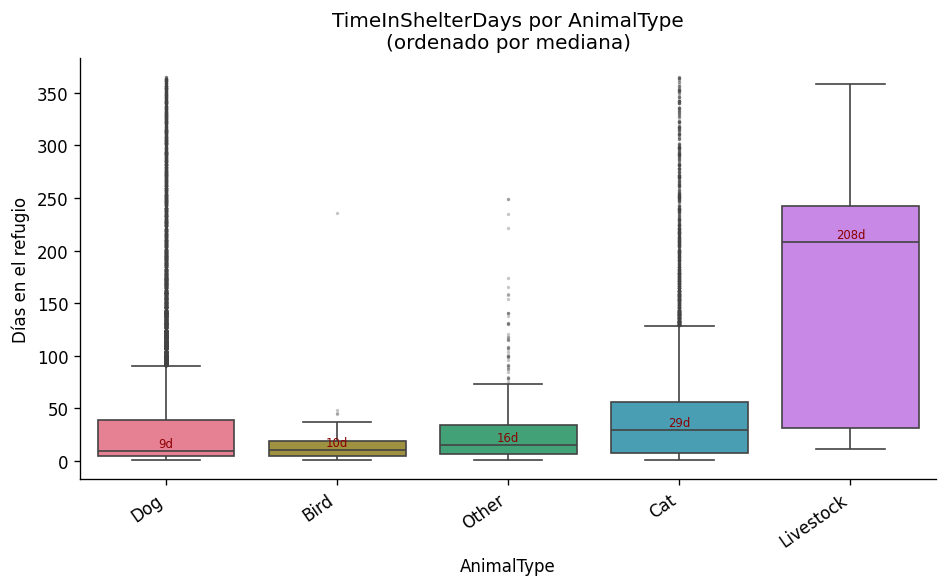

  Kruskal-Wallis test: H=2287.46, p=0.000000 → Diferencia significativa: ✅ Sí (p<0.05)


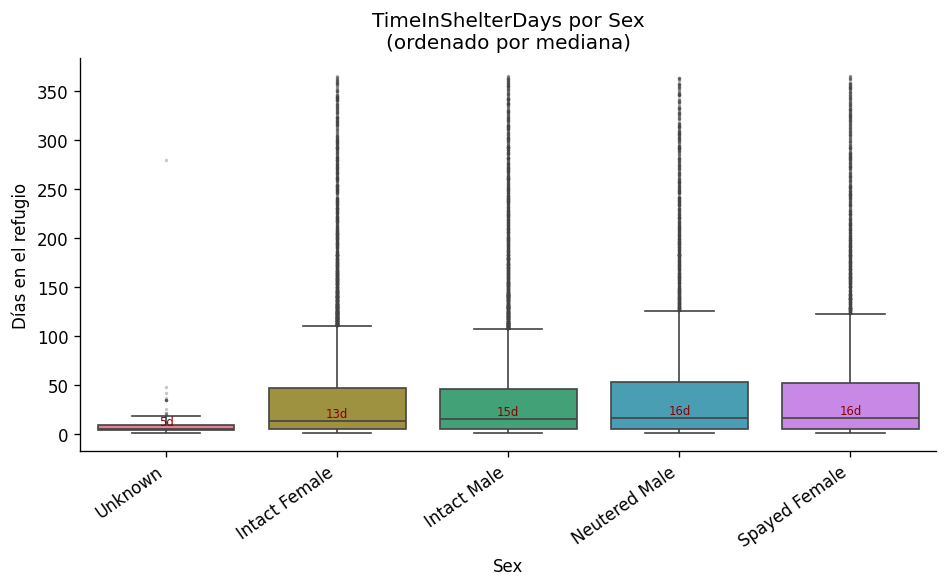

  Kruskal-Wallis test: H=137.60, p=0.000000 → Diferencia significativa: ✅ Sí (p<0.05)


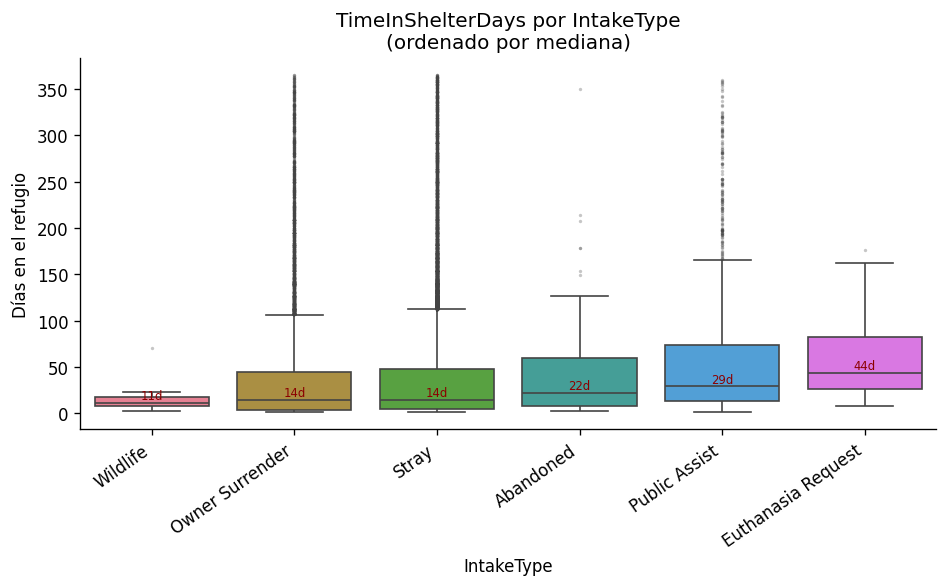

  Kruskal-Wallis test: H=536.56, p=0.000000 → Diferencia significativa: ✅ Sí (p<0.05)


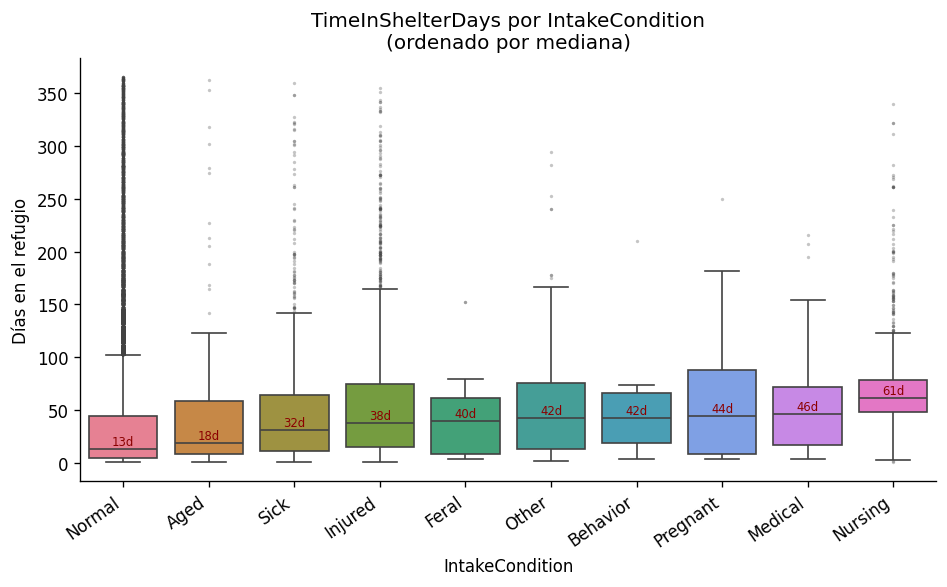

  Kruskal-Wallis test: H=1995.76, p=0.000000 → Diferencia significativa: ✅ Sí (p<0.05)


In [12]:
# ============================================
# Boxplot: Categóricas vs Target
# ============================================

if len(cat_cols) > 0:
    low_card = [c for c in cat_cols if df[c].nunique() <= 25]

    for col in low_card:
        # Ordenar categorías por mediana del target
        order = df.groupby(col)[TARGET].median().sort_values().index

        fig, ax = plt.subplots(figsize=(max(8, len(order) * 0.8), 5))
        sns.boxplot(data=df, x=col, y=TARGET, order=order, palette='husl', ax=ax,
                    flierprops=dict(marker='.', markersize=2, alpha=0.3))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
        ax.set_title(f'TimeInShelterDays por {col}\n(ordenado por mediana)', fontsize=12)
        ax.set_ylabel('Días en el refugio')

        # Añadir medianas
        medians = df.groupby(col)[TARGET].median()[order]
        for i, (cat, med) in enumerate(medians.items()):
            ax.text(i, med + 1, f'{med:.0f}d', ha='center', va='bottom', fontsize=7, color='darkred')

        plt.tight_layout()
        plt.show()

        # Test estadístico Kruskal-Wallis (no paramétrico)
        groups = [df[df[col] == cat][TARGET].dropna() for cat in order]
        stat, p = stats.kruskal(*groups)
        sig = '✅ Sí (p<0.05)' if p < 0.05 else '❌ No (p>=0.05)'
        print(f'  Kruskal-Wallis test: H={stat:.2f}, p={p:.6f} → Diferencia significativa: {sig}')

---
## 1.5 Análisis de Alta Cardinalidad: Breed & Color

Las razas y colores tienen muchas categorías únicas. Analizamos cuáles tienen más impacto.


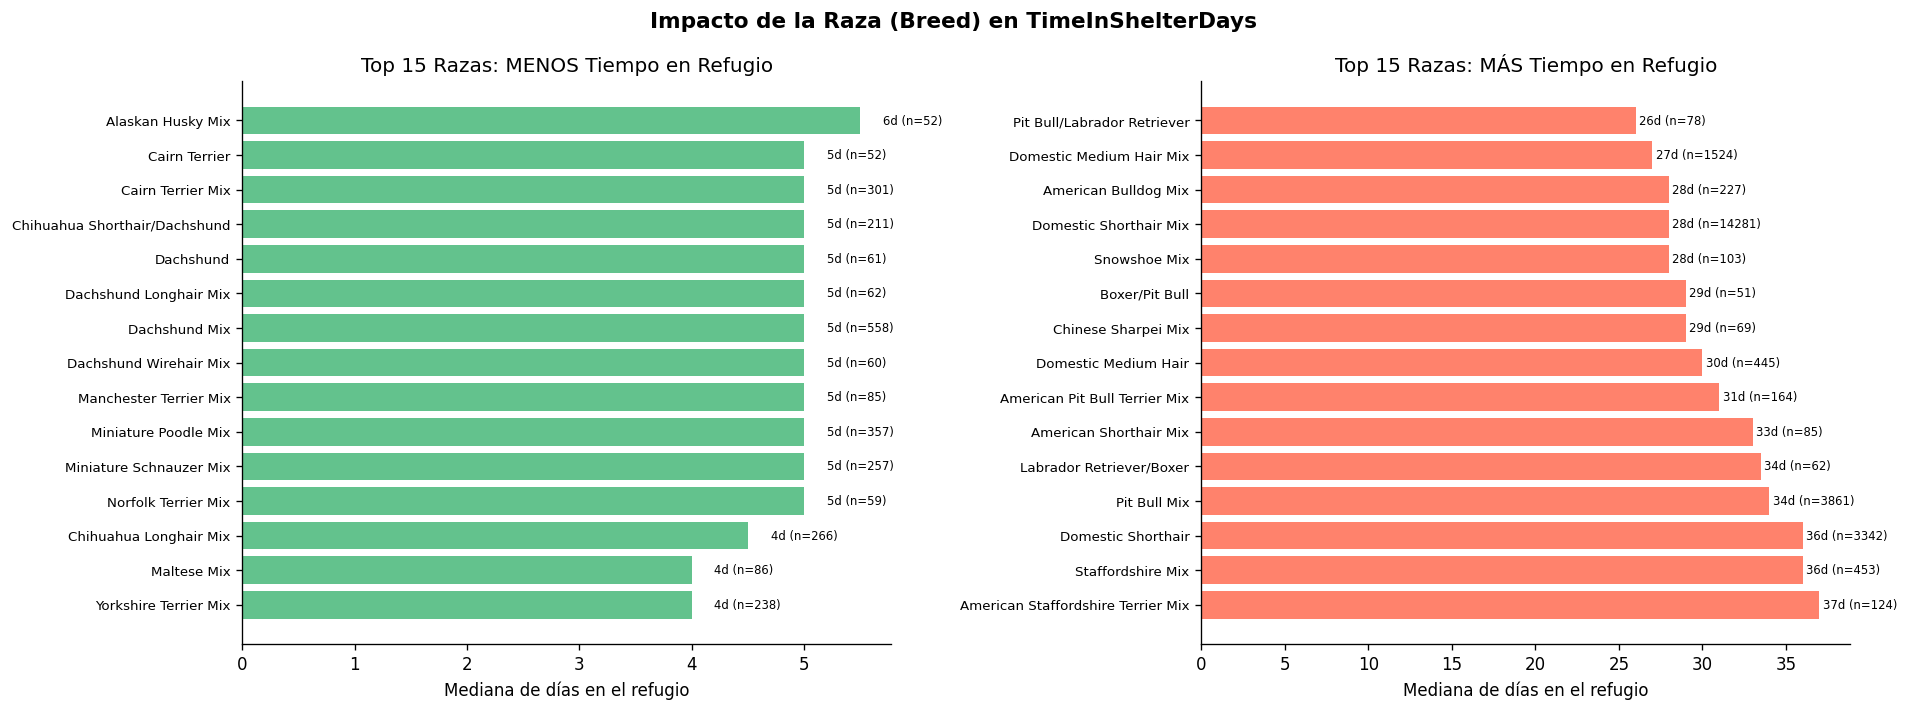


Total de razas únicas: 1884
Razas con >= 50 registros: 101


In [13]:
# ============================================
# Top razas con mayor/menor tiempo en refugio
# ============================================

# Ajustar 'Breed_intake' o 'Breed' según el nombre de tu columna
breed_col = None
for candidate in ['Breed_intake', 'Breed', 'breed']:
    if candidate in df.columns:
        breed_col = candidate
        break

if breed_col:
    # Solo razas con al menos 50 registros
    breed_stats = (
        df.groupby(breed_col)[TARGET]
        .agg(['median', 'mean', 'count'])
        .query('count >= 50')
        .sort_values('median')
    )

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Top 15 razas con MENOR tiempo
    top_fast = breed_stats.head(15)
    axes[0].barh(range(len(top_fast)), top_fast['median'], color='mediumseagreen', alpha=0.8)
    axes[0].set_yticks(range(len(top_fast)))
    axes[0].set_yticklabels(top_fast.index, fontsize=8)
    axes[0].set_xlabel('Mediana de días en el refugio')
    axes[0].set_title('Top 15 Razas: MENOS Tiempo en Refugio')
    for i, (_, row) in enumerate(top_fast.iterrows()):
        axes[0].text(row['median'] + 0.2, i, f"{row['median']:.0f}d (n={row['count']:.0f})", va='center', fontsize=7)

    # Top 15 razas con MAYOR tiempo
    top_slow = breed_stats.tail(15).iloc[::-1]
    axes[1].barh(range(len(top_slow)), top_slow['median'], color='tomato', alpha=0.8)
    axes[1].set_yticks(range(len(top_slow)))
    axes[1].set_yticklabels(top_slow.index, fontsize=8)
    axes[1].set_xlabel('Mediana de días en el refugio')
    axes[1].set_title('Top 15 Razas: MÁS Tiempo en Refugio')
    for i, (_, row) in enumerate(top_slow.iterrows()):
        axes[1].text(row['median'] + 0.2, i, f"{row['median']:.0f}d (n={row['count']:.0f})", va='center', fontsize=7)

    plt.suptitle(f'Impacto de la Raza ({breed_col}) en TimeInShelterDays', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f'\nTotal de razas únicas: {df[breed_col].nunique()}')
    print(f'Razas con >= 50 registros: {len(breed_stats)}')
else:
    print('Columna de raza no encontrada. Verifica el nombre exacto en tu dataset.')

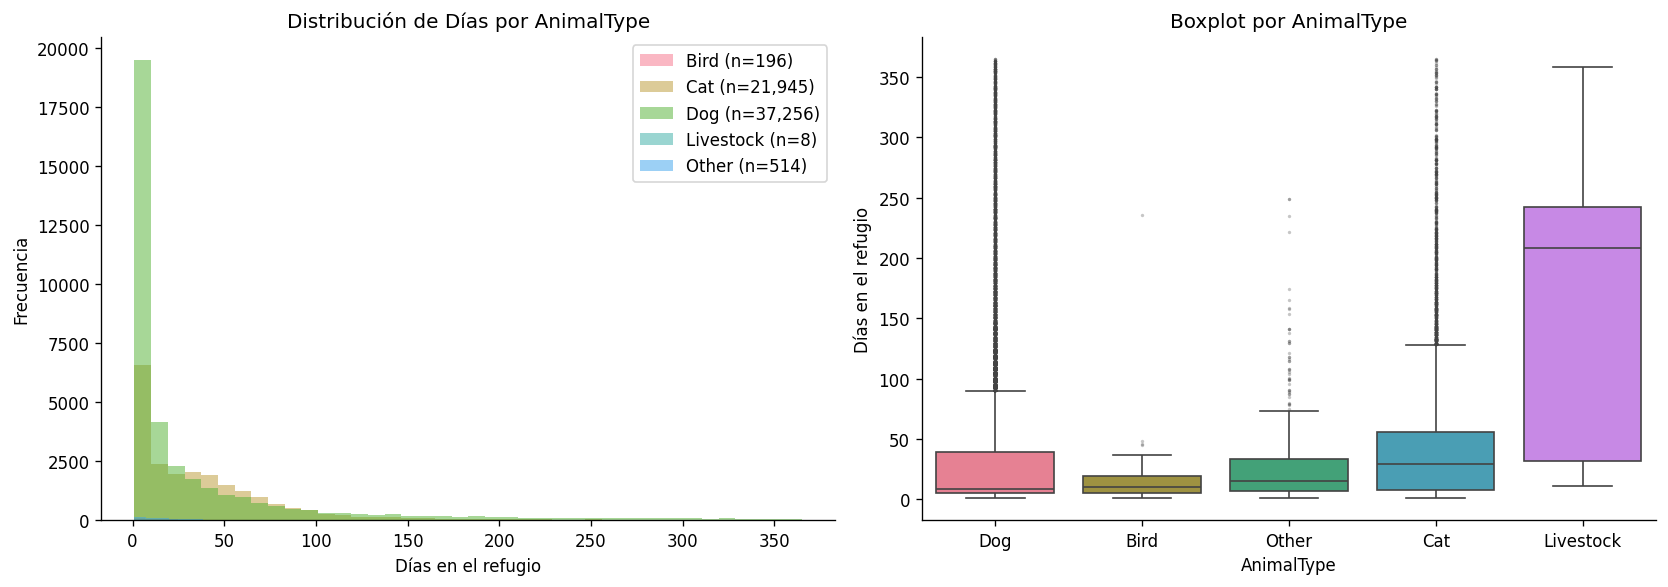


Estadísticas por tipo de animal:
            count  median    mean     std
AnimalType                               
Bird          196    10.0   14.09   18.77
Cat         21945    29.0   41.66   48.07
Dog         37256     9.0   36.91   62.10
Livestock       8   208.5  168.75  131.00
Other         514    15.5   28.76   36.37


In [14]:
# ============================================
# Análisis por Tipo de Animal
# ============================================

animal_col = None
for candidate in ['AnimalType', 'Animal Type_intake', 'Animal Type', 'animal_type']:
    if candidate in df.columns:
        animal_col = candidate
        break

if animal_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Distribución de target por tipo
    for animal_type, group in df.groupby(animal_col):
        axes[0].hist(group[TARGET], bins=40, alpha=0.5, label=f'{animal_type} (n={len(group):,})')
    axes[0].set_title(f'Distribución de Días por {animal_col}')
    axes[0].set_xlabel('Días en el refugio')
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend()

    # Boxplot
    order = df.groupby(animal_col)[TARGET].median().sort_values().index
    sns.boxplot(data=df, x=animal_col, y=TARGET, order=order, palette='husl', ax=axes[1],
                flierprops=dict(marker='.', markersize=2, alpha=0.3))
    axes[1].set_title(f'Boxplot por {animal_col}')
    axes[1].set_ylabel('Días en el refugio')

    plt.tight_layout()
    plt.show()

    print('\nEstadísticas por tipo de animal:')
    print(df.groupby(animal_col)[TARGET].agg(['count', 'median', 'mean', 'std']).round(2))

---
## 1.6 Análisis Temporal


In [15]:
# ============================================
# Análisis de Temporalidad (si hay fechas)
# ============================================

date_cols = [c for c in df.columns if 'date' in c.lower() or 'datetime' in c.lower() or 'monthyear' in c.lower()]
print(f'Columnas de fecha detectadas: {date_cols}')

# Buscar columna de intake
intake_date_col = None
for candidate in ['Intake_DateTime', 'DateTime_intake', 'Intake_MonthYear', 'IntakeDate']:
    if candidate in df.columns:
        intake_date_col = candidate
        break

if intake_date_col:
    df['_intake_date'] = pd.to_datetime(df[intake_date_col], errors='coerce')
    df['_intake_year'] = df['_intake_date'].dt.year
    df['_intake_month'] = df['_intake_date'].dt.month

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Mediana por año
    yearly = df.groupby('_intake_year')[TARGET].median()
    axes[0].plot(yearly.index, yearly.values, marker='o', color='steelblue', linewidth=2)
    axes[0].set_title('Mediana de Días en Refugio por Año de Ingreso')
    axes[0].set_xlabel('Año')
    axes[0].set_ylabel('Mediana de días')
    axes[0].grid(alpha=0.3)

    # Mediana por mes
    monthly = df.groupby('_intake_month')[TARGET].median()
    month_names = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
    axes[1].bar(range(1, 13), [monthly.get(m, 0) for m in range(1, 13)],
                color=sns.color_palette('coolwarm', 12), alpha=0.85)
    axes[1].set_xticks(range(1, 13))
    axes[1].set_xticklabels(month_names)
    axes[1].set_title('Mediana de Días en Refugio por Mes de Ingreso')
    axes[1].set_ylabel('Mediana de días')

    plt.tight_layout()
    plt.show()

    df.drop(columns=['_intake_date', '_intake_year', '_intake_month'], inplace=True)
else:
    print('No se encontró columna de fecha de intake. Saltando análisis temporal.')

Columnas de fecha detectadas: []
No se encontró columna de fecha de intake. Saltando análisis temporal.


---
## 1.7 Matriz de Correlaciones


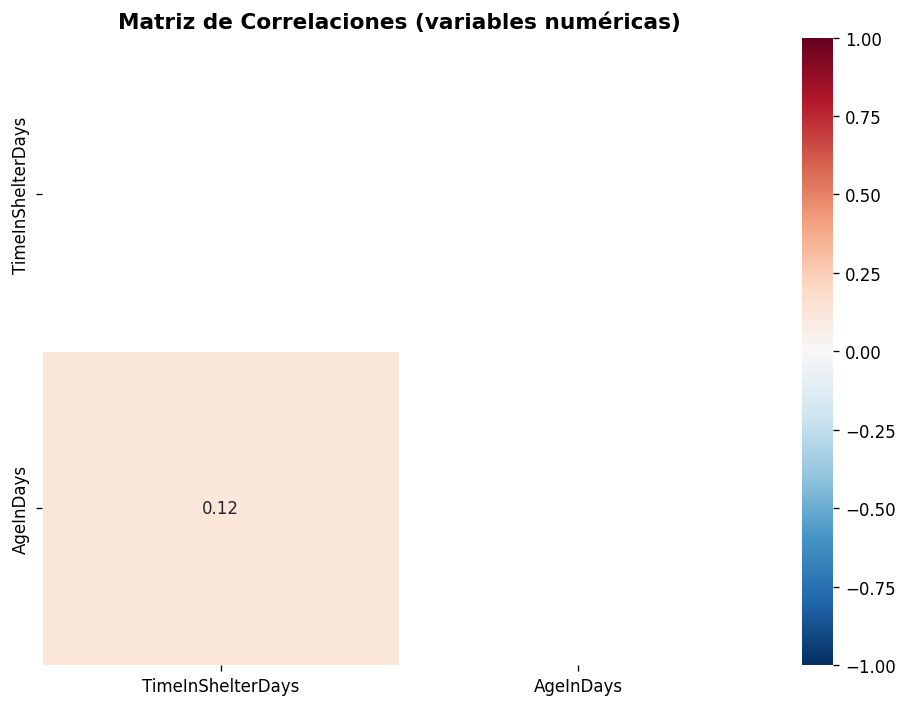


Correlaciones con TimeInShelterDays (numéricas):
  AgeInDays                           +0.1214  ██


In [16]:
# ============================================
# Heatmap de Correlaciones (solo numéricas)
# ============================================

num_for_corr = df.select_dtypes(include=[np.number]).columns.tolist()
num_for_corr = [c for c in num_for_corr if c != TARGET_LOG]  # excluir log del target

if len(num_for_corr) >= 2:
    corr_matrix = df[num_for_corr].corr()

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig, ax = plt.subplots(figsize=(max(8, len(num_for_corr)), max(6, len(num_for_corr))))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
                cmap='RdBu_r', center=0, vmin=-1, vmax=1,
                linewidths=0.5, ax=ax)
    ax.set_title('Matriz de Correlaciones (variables numéricas)', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Correlaciones con el target
    target_corrs = corr_matrix[TARGET].drop(TARGET).sort_values(key=abs, ascending=False)
    print('\nCorrelaciones con TimeInShelterDays (numéricas):')
    for col, val in target_corrs.items():
        bar = '█' * int(abs(val) * 20)
        print(f'  {col:<35} {val:+.4f}  {bar}')
else:
    print('No hay suficientes variables numéricas para heatmap.')

---
## 1.8 Análisis de Outliers en el Target


In [17]:
# ============================================
# Outliers: ¿Afectan el modelado?
# ============================================

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_high = (y > upper).sum()
outliers_low = (y < lower).sum()

print('=' * 60)
print('ANÁLISIS DE OUTLIERS - TimeInShelterDays')
print('=' * 60)
print(f'  Q1={Q1:.0f}, Q3={Q3:.0f}, IQR={IQR:.0f}')
print(f'  Límite inferior (Q1-1.5*IQR): {lower:.0f}')
print(f'  Límite superior (Q3+1.5*IQR): {upper:.0f}')
print(f'\n  Outliers superiores (>{upper:.0f} días): {outliers_high:,} ({outliers_high/len(y)*100:.2f}%)')
print(f'  Outliers inferiores (<{lower:.0f} días):  {outliers_low:,} ({outliers_low/len(y)*100:.2f}%)')
print(f'\n⚠️  DECISIÓN: MANTENER outliers')
print(f'  Razón: Son casos REALES (animales que tardan mucho en adoptarse).')
print(f'  El log-transform reduce su impacto en el entrenamiento.')
print(f'  Eliminarlos sesgaría el modelo hacia animales "fáciles".')

ANÁLISIS DE OUTLIERS - TimeInShelterDays
  Q1=5, Q3=48, IQR=43
  Límite inferior (Q1-1.5*IQR): -60
  Límite superior (Q3+1.5*IQR): 112

  Outliers superiores (>112 días): 4,967 (8.29%)
  Outliers inferiores (<-60 días):  0 (0.00%)

⚠️  DECISIÓN: MANTENER outliers
  Razón: Son casos REALES (animales que tardan mucho en adoptarse).
  El log-transform reduce su impacto en el entrenamiento.
  Eliminarlos sesgaría el modelo hacia animales "fáciles".


---
## 1.9 Relaciones Cruzadas Clave


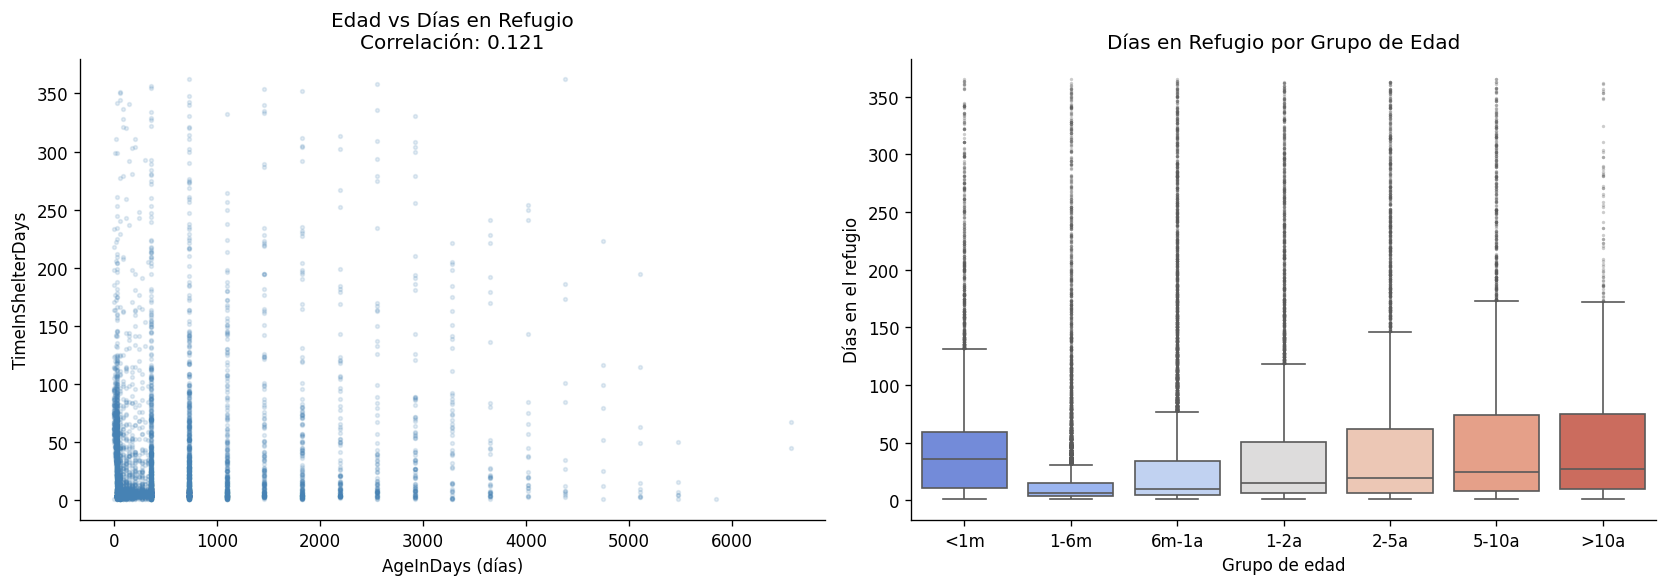


Mediana de días por grupo de edad:
            count  median  mean
_age_group                     
<1m         13814    36.0  43.9
1-6m        12282     6.0  21.2
6m-1a       14282    10.0  33.7
1-2a         8147    15.0  42.7
2-5a         6482    19.0  49.9
5-10a        3841    25.0  57.5
>10a          767    27.0  57.9


In [18]:
# ============================================
# Edad del animal vs Tiempo en refugio
# ============================================

age_col = None
for candidate in ['AgeInDays', 'Age_intake', 'AgeDays']:
    if candidate in df.columns:
        age_col = candidate
        break

if age_col:
    # Crear bins de edad
    age_bins = [0, 30, 180, 365, 730, 1825, 3650, np.inf]
    age_labels = ['<1m', '1-6m', '6m-1a', '1-2a', '2-5a', '5-10a', '>10a']
    df['_age_group'] = pd.cut(df[age_col], bins=age_bins, labels=age_labels)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter edad vs días
    sample = df[[age_col, TARGET]].dropna().sample(min(5000, len(df)), random_state=42)
    axes[0].scatter(sample[age_col], sample[TARGET], alpha=0.15, s=5, color='steelblue')
    corr = df[age_col].corr(df[TARGET])
    axes[0].set_xlabel(f'{age_col} (días)')
    axes[0].set_ylabel('TimeInShelterDays')
    axes[0].set_title(f'Edad vs Días en Refugio\nCorrelación: {corr:.3f}')

    # Boxplot por grupo de edad
    order = age_labels
    sns.boxplot(data=df, x='_age_group', y=TARGET, order=order, palette='coolwarm', ax=axes[1],
                flierprops=dict(marker='.', markersize=2, alpha=0.3))
    axes[1].set_title('Días en Refugio por Grupo de Edad')
    axes[1].set_xlabel('Grupo de edad')
    axes[1].set_ylabel('Días en el refugio')

    plt.tight_layout()
    plt.show()

    print('\nMediana de días por grupo de edad:')
    print(df.groupby('_age_group', observed=True)[TARGET].agg(['count', 'median', 'mean']).round(1))

    df.drop(columns=['_age_group'], inplace=True)
else:
    print('Columna de edad no encontrada.')

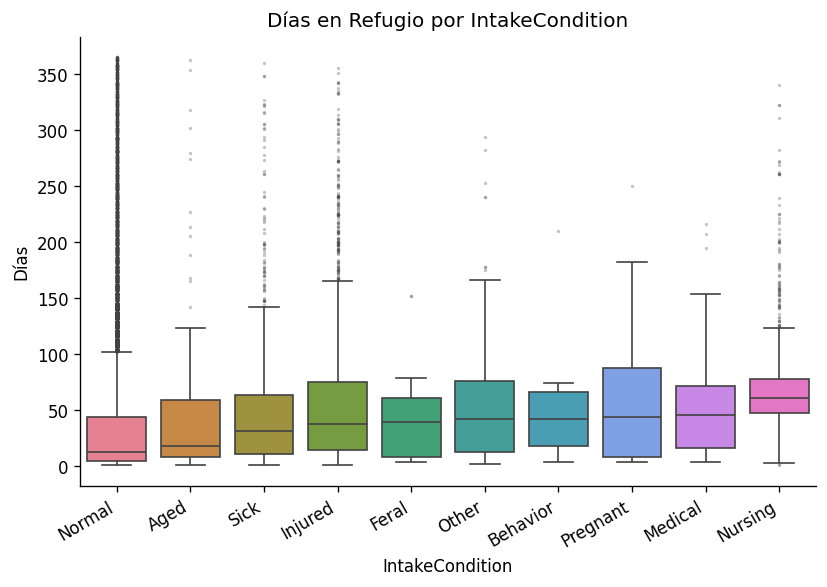

In [19]:
# ============================================
# Sexo / Condición vs Días en Refugio
# ============================================

sex_col = None
for candidate in ['Sex upon Intake', 'SexUponIntake', 'Sex_intake', 'sex_upon_intake']:
    if candidate in df.columns:
        sex_col = candidate
        break

intake_cond_col = None
for candidate in ['IntakeCondition', 'Intake Condition', 'Intake_Condition']:
    if candidate in df.columns:
        intake_cond_col = candidate
        break

plot_cols = [c for c in [sex_col, intake_cond_col] if c is not None]

if plot_cols:
    fig, axes = plt.subplots(1, len(plot_cols), figsize=(7 * len(plot_cols), 5))
    if len(plot_cols) == 1:
        axes = [axes]

    for ax, col in zip(axes, plot_cols):
        order = df.groupby(col)[TARGET].median().sort_values().index
        sns.boxplot(data=df, x=col, y=TARGET, order=order, palette='husl', ax=ax,
                    flierprops=dict(marker='.', markersize=2, alpha=0.3))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
        ax.set_title(f'Días en Refugio por {col}')
        ax.set_ylabel('Días')

    plt.tight_layout()
    plt.show()

---
## 1.10 Conclusiones del EDA y Plan para el Modelado


In [20]:
# ============================================
# Resumen Final del EDA
# ============================================

print("""╔══════════════════════════════════════════════════════════════════════╗
║              CONCLUSIONES DEL EDA - PLAN DE MODELADO                ║
╚══════════════════════════════════════════════════════════════════════╝

📊 VARIABLE OBJETIVO (TimeInShelterDays)
   ✅ Rango: 1 - 365 días
   ✅ Fuerte sesgo a la derecha → usaremos log(1+y) para entrenar
   ✅ Las predicciones finales se devolverán a escala original con exp(pred)-1
   ✅ Métrica principal: RMSE en escala original + MAE + R²

🔢 VARIABLES NUMÉRICAS
   → AgeInDays: variable continua, puede requerir normalización
   → Correlación moderada/baja con el target (problema difícil, esperado)

🏷️  VARIABLES CATEGÓRICAS
   → Baja cardinalidad (AnimalType, Sex, etc.): One-Hot Encoding
   → Alta cardinalidad (Breed, Color): Target Encoding o frecuencia
   → Diferencias significativas entre grupos (Kruskal-Wallis p<0.05)

🕐 TEMPORALIDAD
   → Si hay variación por mes/año, considerar features de estacionalidad

⚡ PLAN PARA EL NOTEBOOK 02_feature_engineering.ipynb:
   1. Encoding de categóricas (OHE + Target Encoding para alta cardinalidad)
   2. Normalización de numéricas (StandardScaler para LR, no necesario para árboles)
   3. Features adicionales: is_kitten, is_puppy, is_mixed_breed, intake_month, etc.
   4. Train/validation/test split (70/15/15)
   5. Guardar X_train, X_val, X_test, y_train, y_val, y_test

🤖 PLAN PARA EL NOTEBOOK 03_modeling.ipynb:
   Modelos a comparar:
   1. Linear Regression (baseline)
   2. Random Forest Regressor
   3. XGBoost / LightGBM
   Todos entrenarán sobre log(1+y) y evaluarán en escala original.
""")

╔══════════════════════════════════════════════════════════════════════╗
║              CONCLUSIONES DEL EDA - PLAN DE MODELADO                ║
╚══════════════════════════════════════════════════════════════════════╝

📊 VARIABLE OBJETIVO (TimeInShelterDays)
   ✅ Rango: 1 - 365 días
   ✅ Fuerte sesgo a la derecha → usaremos log(1+y) para entrenar
   ✅ Las predicciones finales se devolverán a escala original con exp(pred)-1
   ✅ Métrica principal: RMSE en escala original + MAE + R²

🔢 VARIABLES NUMÉRICAS
   → AgeInDays: variable continua, puede requerir normalización
   → Correlación moderada/baja con el target (problema difícil, esperado)

🏷️  VARIABLES CATEGÓRICAS
   → Baja cardinalidad (AnimalType, Sex, etc.): One-Hot Encoding
   → Alta cardinalidad (Breed, Color): Target Encoding o frecuencia
   → Diferencias significativas entre grupos (Kruskal-Wallis p<0.05)

🕐 TEMPORALIDAD
   → Si hay variación por mes/año, considerar features de estacionalidad

⚡ PLAN PARA EL NOTEBOOK 02_feature

In [21]:
# ============================================
# Snapshot del dataset al final del EDA
# ============================================

# Eliminar columna auxiliar si existe
if TARGET_LOG in df.columns:
    df_eda = df.drop(columns=[TARGET_LOG])
else:
    df_eda = df.copy()

print('=' * 70)
print('DATASET AL FINALIZAR EDA')
print('=' * 70)
print(f'  Registros:  {len(df_eda):,}')
print(f'  Columnas:   {df_eda.shape[1]}')
print(f'  Nulls:      {df_eda.isnull().sum().sum()}')
print(f'  Target (TimeInShelterDays):')
print(f'    - Media:   {df_eda[TARGET].mean():.2f} días')
print(f'    - Mediana: {df_eda[TARGET].median():.2f} días')
print(f'    - Skew:    {df_eda[TARGET].skew():.3f}')
print(f'\n✅ EDA completado. Siguiente paso: 02_feature_engineering.ipynb')

DATASET AL FINALIZAR EDA
  Registros:  59,919
  Columnas:   8
  Nulls:      0
  Target (TimeInShelterDays):
    - Media:   38.52 días
    - Mediana: 15.00 días
    - Skew:    2.827

✅ EDA completado. Siguiente paso: 02_feature_engineering.ipynb
